In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.2-py3-none-any.whl.metadata (5.0 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
   ----------------------------

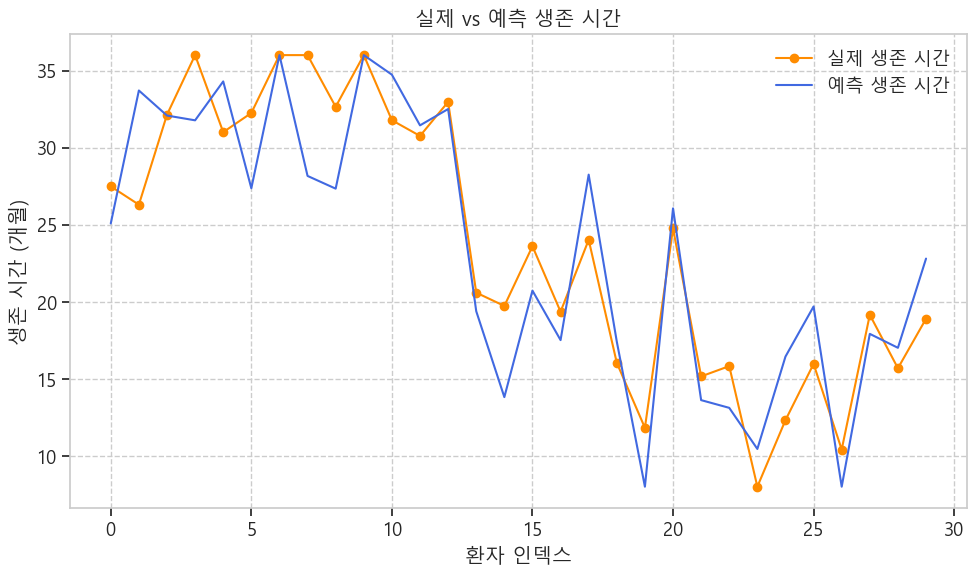

C:\Users\inhag\AppData\Local\Temp\ipykernel_31072\1692484541.py:96: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\inhag\.virtualenvs\Chapter3-MOUFoQMc\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


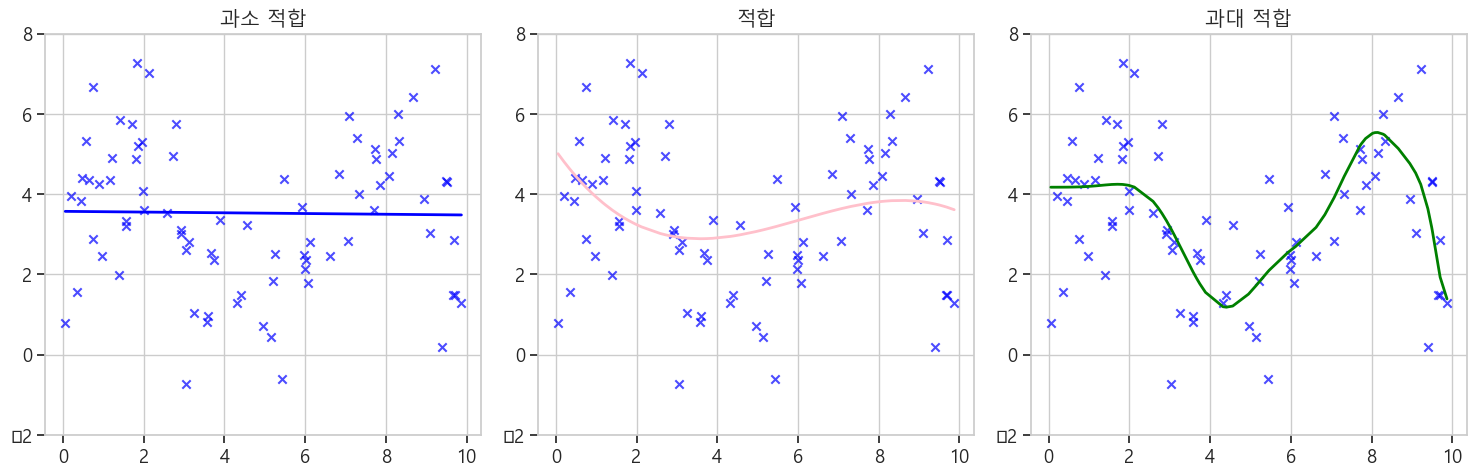

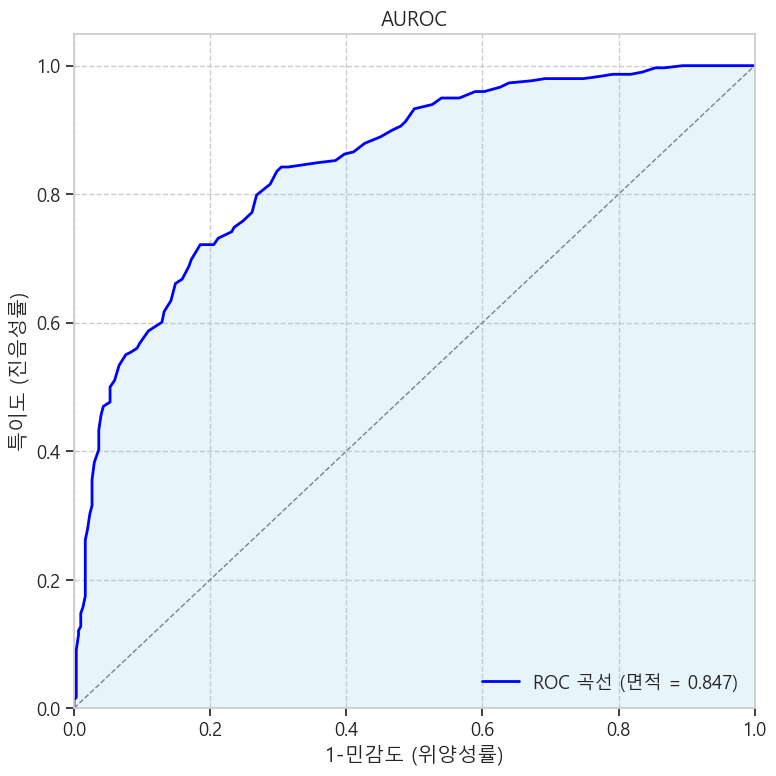

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 시각화를 위한 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정

# 1. 실제 생존 시간과 예측 생존 시간 비교 그래프
# 합성 환자 데이터 생성
np.random.seed(42)  # 재현성을 위한 시드 설정
n_patients = 30  # 환자 수
patient_indices = np.arange(n_patients)  # 환자 인덱스

# 실제 생존 시간 생성 (자연스러운 변동성 포함)
# 사인 함수를 사용하여 주기적 패턴을 만들고 노이즈를 추가
actual_survival = 25 + 10 * np.sin(patient_indices/5) + np.random.normal(0, 5, n_patients)
actual_survival = np.clip(actual_survival, 8, 36)  # 값을 합리적인 범위(8개월~36개월)로 제한

# 예측 생존 시간 생성 (실제 값에 오차 추가)
predicted_survival = actual_survival + np.random.normal(0, 4, n_patients)
predicted_survival = np.clip(predicted_survival, 8, 36)  # 동일한 범위로 제한

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(patient_indices, actual_survival, 'o-', color='darkorange', label='실제 생존 시간')
plt.plot(patient_indices, predicted_survival, '-', color='royalblue', label='예측 생존 시간')
plt.xlabel('환자 인덱스')
plt.ylabel('생존 시간 (개월)')
plt.title('실제 vs 예측 생존 시간')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# 2. 적합 예시 (과소적합, 적절한 적합, 과대적합)
np.random.seed(42)  # 일관성을 위한 시드 설정
n_samples = 80  # 데이터 포인트 수
X = np.random.rand(n_samples) * 10  # 0~10 사이의 무작위 X 값
# 비선형 관계를 가진 데이터 생성 (사인 함수 + 노이즈)
y = 3 + 2*np.sin(X) + np.random.normal(0, 1.5, n_samples)

# 예측을 위해 X 값을 정렬
X_sorted = np.sort(X)

# 서로 다른 복잡도의 모델 생성
# 1. 과소적합 - 단순 선형 모델 (복잡한 패턴을 잡아내지 못함)
underfit_model = LinearRegression()
underfit_model.fit(X.reshape(-1, 1), y)
y_underfit = underfit_model.predict(X_sorted.reshape(-1, 1))

# 2. 적절한 적합 - 3차 다항식 모델 (데이터의 패턴을 적절히 포착)
good_fit = PolynomialFeatures(degree=3)
X_good = good_fit.fit_transform(X.reshape(-1, 1))
X_good_sorted = good_fit.transform(X_sorted.reshape(-1, 1))
good_model = LinearRegression()
good_model.fit(X_good, y)
y_good_fit = good_model.predict(X_good_sorted)

# 3. 과대적합 - 15차 다항식 모델 (노이즈까지 학습하여 과도하게 복잡한 모델 생성)
overfit = PolynomialFeatures(degree=15)
X_over = overfit.fit_transform(X.reshape(-1, 1))
X_over_sorted = overfit.transform(X_sorted.reshape(-1, 1))
over_model = LinearRegression()
over_model.fit(X_over, y)
y_overfit = over_model.predict(X_over_sorted)

# 세 가지 모델을 하나의 figure에 그리기
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 과소적합 그래프
axes[0].scatter(X, y, marker='x', color='blue', alpha=0.7)
axes[0].plot(X_sorted, y_underfit, color='blue', linewidth=2)
axes[0].set_title('과소 적합')
axes[0].set_ylim([-2, 8])

# 적절한 적합 그래프
axes[1].scatter(X, y, marker='x', color='blue', alpha=0.7)
axes[1].plot(X_sorted, y_good_fit, color='pink', linewidth=2)
axes[1].set_title('적합')
axes[1].set_ylim([-2, 8])

# 과대적합 그래프
axes[2].scatter(X, y, marker='x', color='blue', alpha=0.7)
axes[2].plot(X_sorted, y_overfit, color='green', linewidth=2)
axes[2].set_title('과대 적합')
axes[2].set_ylim([-2, 8])

plt.tight_layout()
plt.show()

# 3. ROC 곡선 (Receiver Operating Characteristic)
np.random.seed(42)

# 이진 분류 문제를 위한 예제 데이터 생성
n_samples = 1000  # 각 클래스당 샘플 수
# 두 클래스의 데이터 생성 (서로 다른 분포)
X1 = np.random.normal(0, 1, (n_samples, 10))  # 클래스 0 (음성)
X2 = np.random.normal(0.5, 1, (n_samples, 10))  # 클래스 1 (양성)
X = np.vstack([X1, X2])  # 데이터 결합

# 클래스 레이블 생성
y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 분류기 훈련
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 확률 예측
y_scores = clf.predict_proba(X_test)[:, 1]  # 양성 클래스(1)에 대한 확률만 추출

# ROC 곡선과 AUC 계산
fpr, tpr, _ = roc_curve(y_test, y_scores)  # FPR(False Positive Rate)과 TPR(True Positive Rate) 계산
roc_auc = auc(fpr, tpr)  # 곡선 아래 면적 계산

# ROC 곡선 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC 곡선 (면적 = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # 참조선 (무작위 예측)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-민감도 (위양성률)')
plt.ylabel('특이도 (진음성률)')
plt.title('AUROC')
plt.legend(loc="lower right")
plt.fill_between(fpr, tpr, 0, alpha=0.2, color='skyblue')  # 곡선 아래 영역 채우기
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()